<a href="https://colab.research.google.com/github/jongkwangyun/quant/blob/main/%EC%9B%94%EC%9A%94%ED%95%98%EB%9D%BD%ED%9A%A8%EA%B3%BC_%EA%B2%80%EC%A6%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 첫 설치 이후 설치 안함
#!pip install yfinance

In [6]:
# 첫 설치 이후 설치 안함
#!pip install pandas_market_calendars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.4/191.4 kB 11.0 MB/s eta 0:00:00


In [17]:
from pandas_datareader import data as pdr
import yfinance as yf

import pandas as pd
import exchange_calendars as ecals
from datetime import datetime, timedelta
from IPython.display import display, Markdown
import csv

# display에서 소수점 4자리까지 표현
pd.options.display.float_format = '{:.4f}'.format

# display시 DataFrame 모든 열 표시
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 11)

# 1년 전 개장일 구하기
us_market_code = "XNYS"
us_calendar = ecals.get_calendar(us_market_code)

# 각 날짜 변수에 저장
today = datetime.today().date()
today_workday = pd.Timestamp(us_calendar.previous_open(today - timedelta(days=0)).date())
month_01_ago_workday = pd.Timestamp(us_calendar.previous_open(today - timedelta(days=30)).date())
month_03_ago_workday = pd.Timestamp(us_calendar.previous_open(today - timedelta(days=91)).date())
month_06_ago_workday = pd.Timestamp(us_calendar.previous_open(today - timedelta(days=182)).date())
month_12_ago_workday = pd.Timestamp(us_calendar.previous_open(today - timedelta(days=365)).date())

# 검증 ETF 명 리스트에 담기
ETFS = ['SPY', 'QQQ', 'DIA', 'IWM']

# ETF 가격 추출. 마지막[배열]은 해당 배열 순서대로 하기 위해
df_ETFS = yf.download(ETFS)['Adj Close'].sort_index(ascending=False)[ETFS].dropna()
display(df_ETFS)

[*********************100%%**********************]  4 of 4 completed


,SPY,QQQ,DIA,IWM
Date,,,,
2023-08-18,436.5000,358.1300,345.1200,184.6500
2023-08-17,436.2900,358.5800,344.5500,183.6500
2023-08-16,439.6400,362.5400,347.2560,185.8400
2023-08-15,442.8900,366.4200,349.0933,188.1400
2023-08-14,448.1100,370.3500,352.6879,190.6600
...,...,...,...,...
2000-06-02,96.4046,80.2692,64.3695,37.8028
2000-06-01,94.7540,74.9108,63.7614,35.9335
2000-05-31,93.1238,71.2671,63.0504,35.1373


In [27]:
# 전 영업일 대비  영업일 변화율 계산
df_ETFS_returns = (((df_ETFS / df_ETFS.shift(-1)) - 1) * 100).dropna()

# 결과 출력
display(df_ETFS_returns)

,SPY,QQQ,DIA,IWM
Date,,,,
2023-08-18,0.0481,-0.1255,0.1654,0.5445
2023-08-17,-0.7620,-1.0923,-0.7793,-1.1784
2023-08-16,-0.7338,-1.0589,-0.5263,-1.2225
2023-08-15,-1.1649,-1.0612,-1.0192,-1.3217
2023-08-14,0.5520,1.1222,0.0595,-0.1728
...,...,...,...,...
2000-06-05,-0.4862,0.2503,0.6829,-0.3663
2000-06-02,1.7420,7.1531,0.9537,5.2024
2000-06-01,1.7505,5.1128,1.1276,2.2660


In [29]:
# 날짜별 요일 계산
date_range = pd.date_range(start='2000-05-30', end=today_workday, freq='B')
# freq='B'는 평일(영업일)만 포함하는 주기를 나타냅니다.

# 날짜별 요일을 계산하여 새로운 DataFrame 생성
weekday_series = pd.Series(date_range.day_name(), index=date_range, name='Weekday')

# 기존 DataFrame과 날짜별 요일 정보를 합치기
df_ETFS_returns_with_weekday = pd.concat([weekday_series, df_ETFS_returns], axis=1).sort_index(ascending=False)

# 결과 출력
display(df_ETFS_returns_with_weekday)

,Weekday,SPY,QQQ,DIA,IWM
2023-08-18,Friday,0.0481,-0.1255,0.1654,0.5445
2023-08-17,Thursday,-0.7620,-1.0923,-0.7793,-1.1784
2023-08-16,Wednesday,-0.7338,-1.0589,-0.5263,-1.2225
2023-08-15,Tuesday,-1.1649,-1.0612,-1.0192,-1.3217
2023-08-14,Monday,0.5520,1.1222,0.0595,-0.1728
...,...,...,...,...,...
2000-06-05,Monday,-0.4862,0.2503,0.6829,-0.3663
2000-06-02,Friday,1.7420,7.1531,0.9537,5.2024
2000-06-01,Thursday,1.7505,5.1128,1.1276,2.2660
2000-05-31,Wednesday,0.2193,-2.8488,-0.1186,0.3626


In [32]:
# 요일별 변화율의 평균 계산
average_returns_by_weekday = df_ETFS_returns_with_weekday.groupby('Weekday').mean()

# 요일 순으로 결과 정렬
sorted_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
average_returns_by_weekday_sorted = average_returns_by_weekday.reindex(sorted_weekdays)

# 결과 출력
display(average_returns_by_weekday_sorted)

,SPY,QQQ,DIA,IWM
Weekday,,,,
Monday,0.0180,0.0283,0.0375,-0.0007
Tuesday,0.0690,0.0692,0.0686,0.0996
Wednesday,0.0422,0.0754,0.0426,0.0384
Thursday,0.0303,0.0821,0.0253,0.0141
Friday,0.0115,-0.0444,0.0075,0.0484


<Figure size 1000x600 with 0 Axes>

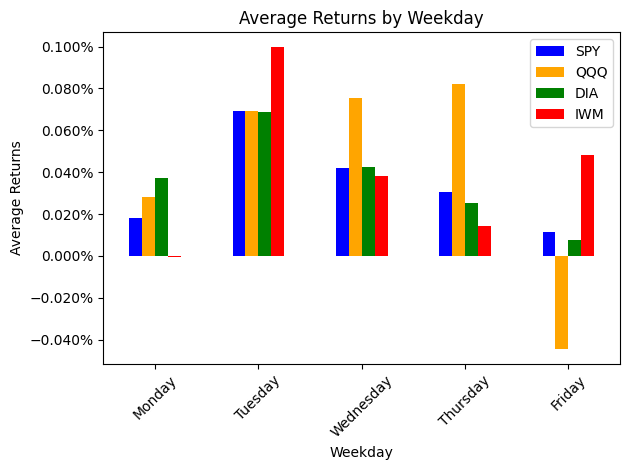

In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 요일별 색상 설정
colors = ['blue', 'orange', 'green', 'red', 'purple']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
ax = average_returns_by_weekday_sorted.plot(kind='bar', color=colors)
plt.title('Average Returns by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Returns')
plt.xticks(rotation=45)

# y 축 눈금을 백분율로 설정
ax.yaxis.set_major_formatter(mticker.PercentFormatter())

plt.tight_layout()

# 그래프 출력
plt.show()